# MLB PITCHER ANALYSIS
## University of Toronto School of Continuing Studies
## Course: Machine Learning  SCS 3253 - 024
## Instructor: Matthew MacDonald
## Team Members: Jonathan Castellanes, Hubert Castellanes, Gaurav Batra

# IMPORTS

In [1]:
#IMPORTS
import pandas as pd
import numpy as np
import random
from random import randint
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

pd.set_option('display.max_columns', None)
np.random.seed(42)

# LOAD DATA

In [2]:
df = pd.read_csv('PitcherData.csv')
df

,px,pz,end_speed,pitch_type,b_score,ab_id,b_count,s_count,outs,pitch_num,on_1b,on_2b,on_3b,pitch_type_code,year,inning,p_score,type_B,type_S,type_X,stand_L,stand_R
0,-1.598000,1.869000,82.8,1,0.0,2015000632,0.0,0.0,0.0,1.0,0.0,0.0,0.0,FB,2015,1,0,0,1,0,1,0
1,-0.909000,2.487000,85.0,1,0.0,2015000632,0.0,1.0,0.0,2.0,0.0,0.0,0.0,FB,2015,1,0,0,1,0,1,0
2,-1.585000,2.934000,86.6,1,0.0,2015000632,0.0,2.0,0.0,3.0,0.0,0.0,0.0,FB,2015,1,0,1,0,0,1,0
3,0.364000,0.245000,79.9,3,0.0,2015000632,1.0,2.0,0.0,4.0,0.0,0.0,0.0,OS,2015,1,0,1,0,0,1,0
4,-1.927000,4.250000,85.7,1,0.0,2015000632,2.0,2.0,0.0,5.0,0.0,0.0,0.0,FB,2015,1,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13375,-0.176597,2.767898,89.0,1,1.0,2018179463,3.0,2.0,1.0,8.0,0.0,0.0,0.0,FB,2018,7,3,0,1,0,0,1
13376,-0.177377,2.792270,87.8,1,1.0,2018179463,3.0,2.0,1.0,9.0,0.0,0.0,0.0,FB,2018,7,3,0,1,0,0,1
13377,0.167994,1.369971,78.8,2,1.0,2018179463,3.0,2.0,1.0,10.0,0.0,0.0,0.0,BR,2018,7,3,0,1,0,0,1
13378,0.206482,2.114205,86.1,1,1.0,2018179464,0.0,0.0,2.0,1.0,0.0,0.0,0.0,FB,2018,7,3,0,0,1,1,0


In [3]:
#drop any leftover 
df.dropna(inplace=True)

## INITIAL DATA VISUALIZATIONS

<Figure size 1152x720 with 0 Axes>

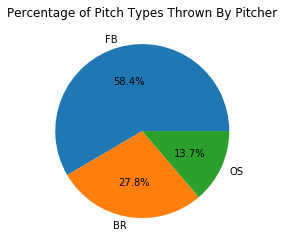

<Figure size 1152x720 with 0 Axes>

In [4]:
#Percentage of Pitch Types Thrown
pitchtypecounts = df['pitch_type_code'].value_counts()
pitchplt = plt.pie(pitchtypecounts.values, labels = pitchtypecounts.index, autopct='%1.1f%%')
plt.title("Percentage of Pitch Types Thrown By Pitcher")
plt.figure(figsize=(16,10))

Text(0.5, 1.0, 'Percentage of Pitches thrown vs Left Handers and Right Handers')

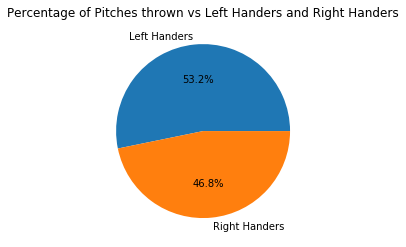

In [5]:
#Percentage of pitches thrown vs. Left and Right Handers
LH = df['stand_L'].value_counts()
handplt = plt.pie(LH.values, labels = ['Left Handers', 'Right Handers'], autopct='%1.1f%%')
plt.title("Percentage of Pitches thrown vs Left Handers and Right Handers")

Text(0.5, 1.0, 'Percentage of Pitch Types thrown against Left Handed Batters')

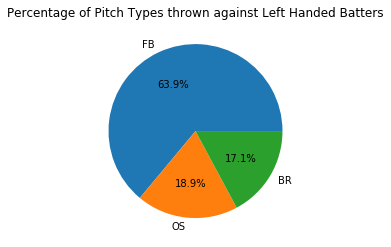

In [54]:
LHB = df[df['stand_L']==1]['pitch_type_code'].value_counts()
plt.pie(LHB.values, labels = LHB.index, autopct='%1.1f%%')
plt.title("Percentage of Pitch Types thrown against Left Handed Batters")

Text(0.5, 1.0, 'Percentage of Pitch Types thrown against Right Handed Batters')

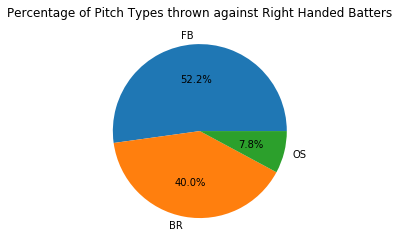

In [55]:
RHB = df[df['stand_L']==0]['pitch_type_code'].value_counts()
plt.pie(RHB.values, labels = RHB.index, autopct='%1.1f%%')
plt.title("Percentage of Pitch Types thrown against Right Handed Batters")

Text(0.5, 1.0, 'Percentage of Pitches thrown when Strikes > Balls')

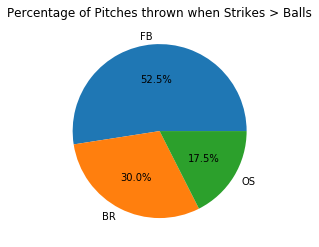

In [6]:
#Percentage of pitch types thrown when the pitcher is ahead in the count (strikes > balls)
df['a_count'] = df['s_count'] - df['b_count']
acount = df[df['a_count'] > 0]['pitch_type_code'].value_counts()
plt.pie(acount.values, labels = acount.index, autopct='%1.1f%%')
plt.title("Percentage of Pitches thrown when Strikes > Balls")

Text(0.5, 1.0, 'Percentage of Pitches thrown when Strikes <= Balls')

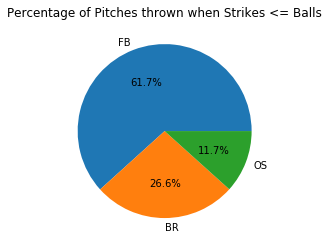

In [7]:
#Percentage of pitch types thrown when the pitcher is behind the count (strikes <= balls)
behcount = df[df['a_count']<=0]['pitch_type_code'].value_counts()
plt.pie(behcount.values, labels = behcount.index, autopct='%1.1f%%')
plt.title("Percentage of Pitches thrown when Strikes <= Balls")

Text(0.5, 1.0, 'Percentage of Pitches thrown when there are NO runners on base')

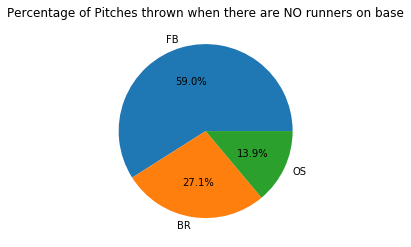

In [8]:
#Percentage of pitch types thrown when there are NO runners on base
#no players on base if 'totalon_b' = 0
df['totalon_b'] = df['on_1b'] + df['on_2b'] + df['on_3b']
onbase = df[df['totalon_b']==0]['pitch_type_code'].value_counts()
plt.pie(onbase.values, labels = onbase.index, autopct='%1.1f%%')
plt.title("Percentage of Pitches thrown when there are NO runners on base")

Text(0.5, 1.0, 'Percentage of Pitches thrown when runners are in scoring position')

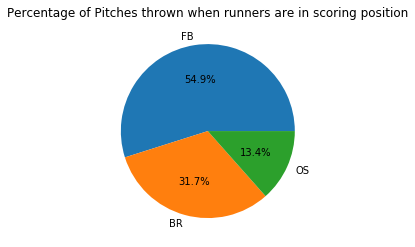

In [9]:
#Percentage of Pitch Types thrown when runners are in scoring position (on_2b and/or on_3b are equal to 1)
df['scoring_p'] = df['on_2b'] + df['on_3b']
scor = df[df['scoring_p']>0]['pitch_type_code'].value_counts()
plt.pie(scor.values, labels = scor.index, autopct='%1.1f%%')
plt.title("Percentage of Pitches thrown when runners are in scoring position")

Text(0.5, 1.0, 'Percentage of Pitches thrown when there is a runner on 1st base')

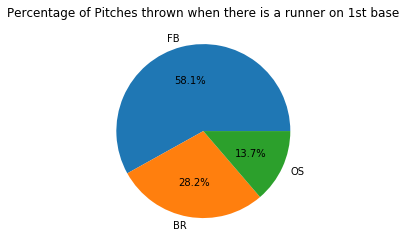

In [10]:
#Percentage of pitch types thrown when runners are in scoring position (on_1b is equal to 1)
first = df[df['on_1b']==1]['pitch_type_code'].value_counts()
plt.pie(first.values, labels = first.index, autopct='%1.1f%%')
plt.title("Percentage of Pitches thrown when there is a runner on 1st base")

In [11]:
#drop more unnecessary columns
df.drop(columns=['px','pz','end_speed','year', 'ab_id','pitch_num','stand_R','a_count','totalon_b','scoring_p'],
        inplace=True)

## Break up data into X and y

In [12]:
#breaks up the dataframe into the X and two Y components (integer category pitchcode and 2 letter-code pitchletter)
def dataFrameBreakUp(df1):
    y_pitchletter = df1['pitch_type_code']
    y_pitchcode = df1['pitch_type']
    outputdf = df1.drop(columns=['pitch_type_code','pitch_type'])
    return outputdf, y_pitchletter, y_pitchcode

In [13]:
#X = dataset
#y1 = 2 letter pitch code array
#y = integer code for the pitch type
# based on this dictionary
# pitchmap = {'FB': 1, 'BR': 2, 'OS': 3}

X, y1, y = dataFrameBreakUp(df) 

## Split Data into Train and Test sets

In [14]:
X_train, X_test, y1_train, y1_test, y_train, y_test = train_test_split(X, y1, y, test_size = 0.2)
X_train.shape, X_test.shape, y1_train.shape, y1_test.shape, y_train.shape, y_test.shape

((10704, 13), (2676, 13), (10704,), (2676,), (10704,), (2676,))

## Standard Scaler

In [15]:
from sklearn.preprocessing import StandardScaler
stdscaler = StandardScaler()
X_train_scaled = stdscaler.fit_transform(X_train)
X_test_scaled = stdscaler.transform(X_test)

## Pure Random Guessing (for base comparison)

In [16]:
randomguess = []
maxguess = np.max(y_train)
for i in np.arange(0,len(y_train)):
    randomguess = randomguess + [np.random.randint(1,maxguess)]
randomguess = np.array(randomguess)
randomguess

print(classification_report(y_train,randomguess))

              precision    recall  f1-score   support

           1       0.59      0.50      0.54      6241
           2       0.29      0.53      0.38      2987
           3       0.00      0.00      0.00      1476

    accuracy                           0.44     10704
   macro avg       0.29      0.34      0.31     10704
weighted avg       0.43      0.44      0.42     10704



D:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


## Default kNeighborsClassifier

In [17]:
from sklearn.neighbors import KNeighborsClassifier
knc = KNeighborsClassifier()

In [18]:
%%time
mytree = knc.fit(X_train_scaled, y1_train)

Wall time: 44.3 ms


In [19]:
#classification report for training data
y_hat_train = knc.predict(X_train_scaled)
print(classification_report(y1_train, y_hat_train))

              precision    recall  f1-score   support

          BR       0.57      0.57      0.57      2987
          FB       0.71      0.83      0.77      6241
          OS       0.62      0.20      0.30      1476

    accuracy                           0.67     10704
   macro avg       0.63      0.53      0.54     10704
weighted avg       0.66      0.67      0.65     10704



In [20]:
#classification report for test data
y_hat_test = knc.predict(X_test_scaled)
print(classification_report(y1_test, y_hat_test))

              precision    recall  f1-score   support

          BR       0.35      0.35      0.35       736
          FB       0.62      0.71      0.66      1579
          OS       0.27      0.08      0.12       361

    accuracy                           0.53      2676
   macro avg       0.41      0.38      0.38      2676
weighted avg       0.50      0.53      0.50      2676



## Default DecisionTreeClassifier

In [21]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

NOTE: The Decision Tree Classifier is not affected by Scalers.

In [22]:
%%time
mytree = dtc.fit(X_train, y1_train)

Wall time: 34.9 ms


In [23]:
#classification report for training data
y_hat_train = dtc.predict(X_train)
print(classification_report(y1_train, y_hat_train))

              precision    recall  f1-score   support

          BR       0.83      0.91      0.87      2987
          FB       0.92      0.93      0.92      6241
          OS       0.97      0.74      0.84      1476

    accuracy                           0.90     10704
   macro avg       0.91      0.86      0.88     10704
weighted avg       0.90      0.90      0.90     10704



In [24]:
#classification report for test data
y_hat_test = dtc.predict(X_test)
print(classification_report(y1_test, y_hat_test))

              precision    recall  f1-score   support

          BR       0.34      0.36      0.35       736
          FB       0.62      0.62      0.62      1579
          OS       0.21      0.17      0.19       361

    accuracy                           0.49      2676
   macro avg       0.39      0.39      0.39      2676
weighted avg       0.49      0.49      0.49      2676



### Feature Importance

In [25]:
fi = np.array(dtc.feature_importances_)
Xcols=np.array(X_train.columns)
fidf = pd.DataFrame(data=np.vstack((Xcols,fi)).T, columns=['features','importance'])
fidf = fidf.sort_values(by=['importance'],ascending=False)
fidf

,features,importance
8,p_score,0.186578
0,b_score,0.173416
7,inning,0.159862
3,outs,0.104465
1,b_count,0.0887592
2,s_count,0.065014
4,on_1b,0.0545628
12,stand_L,0.0438974
5,on_2b,0.0331638
6,on_3b,0.0271811


## Default RandomForestClassifier

In [26]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()

In [27]:
%%time
rfc.fit(X_train, y1_train)

Wall time: 104 ms


D:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [28]:
#classification report for training data
y_hat = rfc.predict(X_train)
print(classification_report(y1_train,y_hat))

              precision    recall  f1-score   support

          BR       0.87      0.83      0.85      2987
          FB       0.89      0.94      0.91      6241
          OS       0.87      0.76      0.81      1476

    accuracy                           0.88     10704
   macro avg       0.88      0.84      0.86     10704
weighted avg       0.88      0.88      0.88     10704



In [29]:
#classification report for test data
y_hat = rfc.predict(X_test)
print(classification_report(y1_test,y_hat))

              precision    recall  f1-score   support

          BR       0.33      0.30      0.32       736
          FB       0.60      0.68      0.64      1579
          OS       0.21      0.13      0.16       361

    accuracy                           0.50      2676
   macro avg       0.38      0.37      0.37      2676
weighted avg       0.47      0.50      0.49      2676



In [57]:
fi = np.array(rfc.feature_importances_)
Xcols=np.array(X_train.columns)
fidf = pd.DataFrame(data=np.vstack((Xcols,fi)).T, columns=['features','importance'])
fidf = fidf.sort_values(by=['importance'],ascending=False)
fidf

,features,importance
8,p_score,0.210721
7,inning,0.196831
0,b_score,0.143182
1,b_count,0.103316
3,outs,0.0967811
2,s_count,0.0749395
12,stand_L,0.0462576
4,on_1b,0.0430176
5,on_2b,0.0323472
6,on_3b,0.0172703


### Hyperparameter Tuning for RandomForestClassifier (reduce overtraining)

In [30]:
from sklearn.model_selection import GridSearchCV

#list of values for n_estimators from 1 to 100
estlist = np.arange(1,101)
depthlist = np.arange(1,21)

p_grid = [{'n_estimators': estlist}, 
          {'max_depth' : depthlist}]
#use all possible threads
grid_search_rfc = GridSearchCV(RandomForestClassifier(), param_grid=p_grid, scoring='accuracy')

In [31]:
%%time
grid_search_rfc.fit(X_train,y1_train)

D:\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
D:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_e

D:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change 

Wall time: 1min 47s


D:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_sco...
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  6

In [32]:
#best estimator
grid_search_rfc.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=6, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [33]:
#classification report for best result for training data
y_hat = grid_search_rfc.predict(X_train)
print(classification_report(y1_train,y_hat))

              precision    recall  f1-score   support

          BR       0.55      0.07      0.12      2987
          FB       0.60      0.99      0.74      6241
          OS       0.00      0.00      0.00      1476

    accuracy                           0.59     10704
   macro avg       0.38      0.35      0.29     10704
weighted avg       0.50      0.59      0.47     10704



D:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [34]:
#classification report for best result for test data
y_hat_test = grid_search_rfc.predict(X_test)
print(classification_report(y1_test,y_hat_test))

D:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

          BR       0.47      0.05      0.10       736
          FB       0.60      0.98      0.74      1579
          OS       0.00      0.00      0.00       361

    accuracy                           0.59      2676
   macro avg       0.35      0.35      0.28      2676
weighted avg       0.48      0.59      0.47      2676



### Random Forest - Pitch and Pitch Probability Prediction

In [35]:
pitchprob = grid_search_rfc.predict_proba(X_test)
pitchclass = grid_search_rfc.classes_

Index: 1206
Actual: FB
Predicted: OS


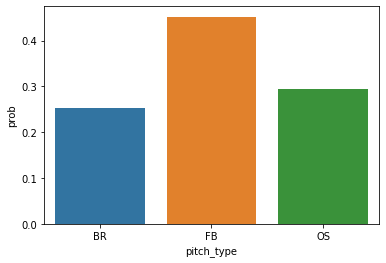

In [60]:
#select a random sample from test data
#and show the Actual/Predicted Pitch types, and Predicted Probabilities of the pitch types for that piece of data
index = randint(0,len(pitchprob))
pitchprobdf = pd.DataFrame(data=pitchclass, columns=['pitch_type'])
pitchprobdf['prob'] = pitchprob[index]
print('Index:', index)
print("Actual:", np.array(y1_test)[index])
print("Predicted:", np.array(y_hat_test)[index])
myplt=sns.barplot(x="pitch_type", y="prob", data=pitchprobdf)

## Default MLPClassifier (sklearn neural network)

In [37]:
from sklearn.neural_network import MLPClassifier
mlpc = MLPClassifier(max_iter=1000)

In [38]:
%%time
mlpc.fit(X_train,y1_train)

Wall time: 7.35 s


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_iter=1000, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [39]:
y_hat = mlpc.predict(X_train)
print(classification_report(y1_train, y_hat))

              precision    recall  f1-score   support

          BR       0.56      0.26      0.36      2987
          FB       0.63      0.91      0.75      6241
          OS       0.50      0.11      0.17      1476

    accuracy                           0.62     10704
   macro avg       0.56      0.43      0.43     10704
weighted avg       0.59      0.62      0.56     10704



In [40]:
y_hat_test = mlpc.predict(X_test)
print(classification_report(y1_test, y_hat_test))

              precision    recall  f1-score   support

          BR       0.38      0.19      0.26       736
          FB       0.61      0.86      0.72      1579
          OS       0.33      0.08      0.13       361

    accuracy                           0.57      2676
   macro avg       0.44      0.38      0.37      2676
weighted avg       0.51      0.57      0.51      2676



In [41]:
#layers, number of epochs (n_iter), and loss
mlpc.n_layers_ , mlpc.n_iter_, mlpc.loss_

(3, 180, 0.820692796900866)

### MLP - Pitch and Pitch Probability Prediction

Index: 788
Actual: FB
Predicted: FB


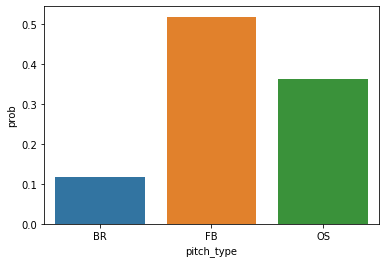

In [42]:
pitchprob = mlpc.predict_proba(X_test)
pitchclass = mlpc.classes_
#select a random sample from test data
#and show the Actual/Predicted Pitch types, and Predicted Probabilities of the pitch types for that piece of data
index = randint(0,len(pitchprob))
pitchprobdf = pd.DataFrame(data=pitchclass, columns=['pitch_type'])
pitchprobdf['prob'] = pitchprob[index]
print('Index:', index)
print("Actual:", np.array(y1_test)[index])
print("Predicted:", np.array(y_hat_test)[index])
myplt=sns.barplot(x="pitch_type", y="prob", data=pitchprobdf)

## Default XGBoost Classifier (Gradient Booster)

In [43]:
import xgboost as xgb
xgbc = xgb.XGBClassifier()

In [44]:
%%time
xgbc.fit(X_train,y1_train)

Wall time: 1.29 s


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [45]:
#classification report for training data
y_hat = xgbc.predict(X_train)
print(classification_report(y1_train, y_hat))

              precision    recall  f1-score   support

          BR       0.52      0.17      0.26      2987
          FB       0.61      0.95      0.74      6241
          OS       0.58      0.01      0.01      1476

    accuracy                           0.60     10704
   macro avg       0.57      0.37      0.34     10704
weighted avg       0.58      0.60      0.51     10704



In [46]:
#classification report for test data
y_hat = xgbc.predict(X_test)
print(classification_report(y1_test,y_hat))

              precision    recall  f1-score   support

          BR       0.43      0.15      0.22       736
          FB       0.61      0.93      0.74      1579
          OS       0.20      0.00      0.01       361

    accuracy                           0.59      2676
   macro avg       0.41      0.36      0.32      2676
weighted avg       0.50      0.59      0.50      2676



### Feature Importance

In [47]:
fi = np.array(xgbc.feature_importances_)
Xcols=np.array(X_train.columns)
fidf = pd.DataFrame(data=np.vstack((Xcols,fi)).T, columns=['features','importance'])
fidf = fidf.sort_values(by=['importance'],ascending=False)
fidf

,features,importance
12,stand_L,0.461767
2,s_count,0.105926
9,type_B,0.0694739
10,type_S,0.0672132
1,b_count,0.0599648
7,inning,0.0542769
5,on_2b,0.0386825
11,type_X,0.0263203
3,outs,0.0254193
4,on_1b,0.0253379


### Hyperparameter Tuning for XGBoost

In [48]:
estlist = np.arange(1,101)
depthlist = np.arange(1,11)

p_grid = [{'n_estimators': estlist}, 
          {'max_depth' : depthlist},
          {'learning_rate' : [0.1, 0.2, 0.3]}]

grid_search_XGB = GridSearchCV(xgbc, param_grid=p_grid, scoring='accuracy')

In [49]:
%%time
grid_search_XGB.fit(X_train,y1_train)

D:\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Wall time: 3min 14s


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, objective='multi:softprob',
                                     random_state=0, reg_alpha=0, r...
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100])},
            

In [50]:
#best estimator
grid_search_XGB.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=18, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [51]:
#classification report for best result for training data
y_hat = grid_search_XGB.predict(X_train)
print(classification_report(y1_train,y_hat))

              precision    recall  f1-score   support

          BR       0.49      0.12      0.20      2987
          FB       0.60      0.96      0.74      6241
          OS       0.00      0.00      0.00      1476

    accuracy                           0.59     10704
   macro avg       0.36      0.36      0.31     10704
weighted avg       0.49      0.59      0.49     10704



D:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [52]:
#classification report for best result for training data
y_hat = grid_search_XGB.predict(X_test)
print(classification_report(y1_test,y_hat))

              precision    recall  f1-score   support

          BR       0.43      0.12      0.18       736
          FB       0.61      0.95      0.74      1579
          OS       0.00      0.00      0.00       361

    accuracy                           0.59      2676
   macro avg       0.34      0.36      0.31      2676
weighted avg       0.48      0.59      0.49      2676



### XGB - Pitch and Pitch Probability Prediction

Index: 1331
Actual: FB
Predicted: FB


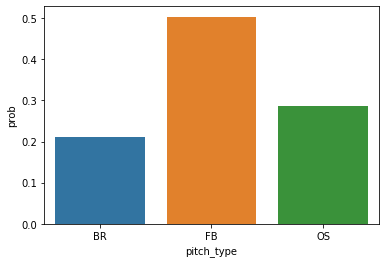

In [58]:
pitchprob = grid_search_XGB.predict_proba(X_test)
pitchclass = grid_search_XGB.classes_
#pick a random row from the test set, and compare the prediction with the actual pitch result
#plot a distribution histogram for the probability of each pitch type
index = randint(0,len(pitchprob))
pitchprobdf = pd.DataFrame(data=pitchclass, columns=['pitch_type'])
pitchprobdf['prob'] = pitchprob[index]
print('Index:', index)
print("Actual:", np.array(y1_test)[index])
print("Predicted:", np.array(y_hat_test)[index])
myplt=sns.barplot(x="pitch_type", y="prob", data=pitchprobdf)